$$
ETL
$$

In [2]:
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium  import webdriver
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import numpy as np

In [57]:
class Extraccion_Url:
    def __init__(self,url):
        
        ''' 
        Este código utiliza Selenium para abrir la página web especificada en la variable url y esperar a que se cargue la tabla dinámica.
        Luego, se extrae el código HTML de la página y se usa BeautifulSoup y pandas para extraer la tabla y guardarla en un DataFrame
        '''
        # Url de Agencia Meteorologia de japon. Información de Terremotos dinamica
        self.url = url

        # Configura el driver de Selenium (en este caso, se usa Chrome)
        options = webdriver.ChromeOptions()
        options.add_argument('--headless') # Ejecuta el navegador en modo headless (sin interfaz gráfica)
        driver = webdriver.Chrome(options=options)

        # Abre la página web con Selenium
        driver.get(self.url)

        # Espera a que se cargue la tabla dinámica (ajusta el tiempo según sea necesario)
        time.sleep(5)

        # Extrae el código HTML de la página
        html = driver.page_source

        # Usa BeautifulSoup y pandas para extraer la tabla
        soup = BeautifulSoup(html, 'html.parser')
        table = soup.find_all('table')[0]
        self.df = pd.read_html(str(table))[0]
        
        
        # Cierra el driver de Selenium
        driver.quit()

    def informacion_6_datos(self,p):

        if p==1: 
            print('Visualizar Data Frame.')
            return self.df.head(5)
        elif p==2:
            print('Tamaño del Data Frame.')
            return self.df.shape
        elif p==3:
            print('Resumen estadistico del Data Frame.')
            return self.df.describe()
        elif p==4:
            print('Hallar valores nulos en el Data Frame.')
            return self.df.isnull().sum()
        elif p==5:
            print('Informacion sobre el tipo de datos y cantidad de valores no nulos del Data Frame.')
            return self.df.info()
        elif p==6:
            print('Resumen estadistico del Data Frame que excluye los numeros.')
            return self.df.describe(exclude='number')

    def matriz_correlacion(self,pais,variables):
        #grafico para ver la relación entre las variable
        # Seleccionar las columnas a incluir en la matriz de correlación
        cols = variables

        # Crear la matriz de correlación
        corr = self.df[cols].corr()

        # Crear el gráfico de correlación utilizando la biblioteca Seaborn
        sns.set(style="white")
        mask = np.triu(np.ones_like(corr, dtype=np.bool_))
        fig, ax = plt.subplots(figsize=(10, 8))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
        plt.title('Matriz de correlación de los datos de sismos en '+pais)
        return plt.show()

$$
JAPON
$$

In [46]:
Japon =  Extraccion_Url('http://ds.iris.edu/ieb/evtable.phtml?caller=IEB&st=1970-01-01&et=2025-01-01&minmag=6&maxmag=10&orderby=time-desc&src=usgs&limit=5000&maxlat=56.000&minlat=22.000&maxlon=159.000&minlon=127.000&sbl=1&pbl=1&caller=self&name=Japan%20Region&zm=3&mt=ter&rgn=Japan%20Region&title=IEB%20export%3A%20786%20earthquakes%20as%20a%20sortable%20table.&stitle=from%201970-01-01%20to%20the%20latest%20available%2C%20with%20magnitudes%20from%206%20to%2010%2C%20all%20depths%2C%20with%20priority%20for%20most%20recent%2C%20limited%20to%205000%2C%20%20showing%20data%20from%20USGS%2C%20')

In [47]:
Japon.informacion_6_datos(1)

Visualizar Data Frame.


,Year,Month,Day,Time UTC,Mag,Lat,Lon,Depth km,Region,USGS ID,Timestamp
0,2023,5,5,05:42:04,6.2,37.5402,137.3053,8.7,"49 km NE of Anamizu, Japan",us6000k9mb,1683265324
1,2023,4,3,03:06:57,6.5,52.7227,158.4935,101.0,"23 km SSE of Vilyuchinsk, Russia",us6000k1mn,1680491217
2,2023,3,28,09:18:28,6.0,41.1480,142.8050,34.0,"129 km ENE of Misawa, Japan",us6000k09q,1679995108
3,2023,2,25,13:27:43,6.0,42.8417,144.9973,51.8,"52 km ESE of Kushiro, Japan",us6000jrjl,1677331663
4,2023,1,16,04:49:51,6.3,28.9804,139.3452,405.0,"Bonin Islands, Japan region",us7000j4mj,1673844591


In [48]:
Japon.informacion_6_datos(2)

Tamaño del Data Frame.


(786, 11)

In [49]:
Japon.informacion_6_datos(3)

Resumen estadistico del Data Frame.


,Year,Month,Day,Mag,Lat,Lon,Depth km,Timestamp
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,7.860000e+02
mean,1997.001272,6.468193,15.451654,6.378372,39.620419,143.594432,99.079135,8.676861e+08
std,14.691087,3.470660,8.369086,0.433578,6.790178,6.864316,154.593090,4.633572e+08
min,1970.000000,1.000000,1.000000,6.000000,22.013000,127.367400,0.000000,1.704785e+06
25%,1985.250000,3.000000,9.000000,6.100000,35.384975,140.461000,21.025000,5.022043e+08
50%,1997.000000,6.000000,15.000000,6.200000,39.823700,142.705500,34.500000,8.661992e+08
75%,2011.000000,10.000000,22.000000,6.500000,44.438850,148.057000,61.075000,1.299824e+09
max,2023.000000,12.000000,31.000000,9.100000,55.970400,158.659000,664.000000,1.683265e+09


In [50]:
Japon.informacion_6_datos(4)

Hallar valores nulos en el Data Frame.


Year         0
Month        0
Day          0
Time UTC     0
Mag          0
Lat          0
Lon          0
Depth km     0
Region       0
USGS ID      0
Timestamp    0
dtype: int64

In [42]:
Japon.informacion_6_datos(5)

Informacion sobre el tipo de datos y cantidad de valores no nulos del Data Frame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       786 non-null    int64  
 1   Month      786 non-null    int64  
 2   Day        786 non-null    int64  
 3   Time UTC   786 non-null    object 
 4   Mag        786 non-null    float64
 5   Lat        786 non-null    float64
 6   Lon        786 non-null    float64
 7   Depth km   786 non-null    float64
 8   Region     786 non-null    object 
 9   USGS ID    786 non-null    object 
 10  Timestamp  786 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 67.7+ KB


In [43]:
Japon.informacion_6_datos(6)

Resumen estadistico del Data Frame que excluye los numeros.


,Time UTC,Region,USGS ID
count,786,786,786
unique,782,128,786
top,13:37:03,Kuril Islands,us6000k9mb
freq,2,162,1


$$
CHILE
$$

In [51]:
Chile = Extraccion_Url('http://www.csn.uchile.cl/sismologia/grandes-terremotos-en-chile/')

In [4]:
Chile.informacion_6_datos(1)

Visualizar Data Frame.


,Fecha local,Hora local,Latitud,Longitud,Magnitud Ms,Magnitud Mw,Profundidad [km],Efecto
0,08/02/1570,9:00,-36.800,-73.00,8.3,-,-,TD
1,17/03/1575,10:00,-33.400,-70.60,7.3,-,-,-
2,16/12/1575,14:30,-39.800,-73.20,8.5,-,-,TD
3,24/11/1604,12:30,-18.500,-70.40,8.5,-,30,TD
4,16/09/1615,23:30,-18.500,-70.35,8.8,-,-,TM


In [5]:
Chile.informacion_6_datos(2)

Tamaño del Data Frame.


(113, 8)

In [6]:
Chile.informacion_6_datos(3)

Resumen estadistico del Data Frame.


,Longitud
count,113.000000
mean,-1952.617584
std,11443.207220
min,-72000.000000
25%,-73.000000
50%,-71.180000
75%,-70.350000
max,-67.500000


In [7]:
Chile.informacion_6_datos(4)

Hallar valores nulos en el Data Frame.


Fecha local         0
Hora local          0
Latitud             0
Longitud            0
Magnitud Ms         0
Magnitud Mw         0
Profundidad [km]    0
Efecto              0
dtype: int64

In [8]:
Chile.informacion_6_datos(5)

Informacion sobre el tipo de datos y cantidad de valores no nulos del Data Frame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha local       113 non-null    object 
 1   Hora local        113 non-null    object 
 2   Latitud           113 non-null    object 
 3   Longitud          113 non-null    float64
 4   Magnitud Ms       113 non-null    object 
 5   Magnitud Mw       113 non-null    object 
 6   Profundidad [km]  113 non-null    object 
 7   Efecto            113 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.2+ KB


In [9]:
Chile.informacion_6_datos(6)

Resumen estadistico del Data Frame que excluye los numeros.


,Fecha local,Hora local,Latitud,Magnitud Ms,Magnitud Mw,Profundidad [km],Efecto
count,113,113,113,113,113,113,113
unique,111,100,84,22,11,37,4
top,22/05/1960,8:00,-18.500,7.3,-,-,-
freq,2,3,6,22,100,52,79


$$
EEUU
$$

* Analsis de datos extraidos de USGS (El Servicio Geologico de los Estados Unidos )https://earthquake.usgs.gov/fdsnws/event/1/

In [3]:
import requests
import json, csv

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&endtime=now'
response = requests.get(url)


Guardar info en archivo .json

In [4]:
data = response.text

with open('datos_usa.json', 'w') as f:
    f.write(data)

Leer archivo json

In [12]:
with open('datos_usa.json','r') as f:
    data = json.loads(f.read())

In [21]:
df = pd.json_normalize(data,
                       record_path=['features'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11502 entries, 0 to 11501
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  11502 non-null  object 
 1   id                    11502 non-null  object 
 2   properties.mag        11502 non-null  float64
 3   properties.place      11193 non-null  object 
 4   properties.time       11502 non-null  int64  
 5   properties.updated    11502 non-null  int64  
 6   properties.tz         0 non-null      object 
 7   properties.url        11502 non-null  object 
 8   properties.detail     11502 non-null  object 
 9   properties.felt       656 non-null    float64
 10  properties.cdi        656 non-null    float64
 11  properties.mmi        122 non-null    float64
 12  properties.alert      57 non-null     object 
 13  properties.status     11502 non-null  object 
 14  properties.tsunami    11502 non-null  int64  
 15  properties.sig     

In [14]:
df.shape

(11502, 30)

In [15]:
df.head(2)

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,ak0235za9d84,1.5,None,1683740770447,1683740868156,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.41,NaN,ml,earthquake,M 1.5 -,Point,"[-148.7179, 63.854, 13.5]"
1,Feature,ak0235za4vu1,2.1,"13 km NW of Happy Valley, Alaska",1683739518811,1683739606608,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.36,NaN,ml,earthquake,"M 2.1 - 13 km NW of Happy Valley, Alaska",Point,"[-151.9141, 60.0289, 79.4]"


In [16]:
df.columns

Index(['type', 'id', 'properties.mag', 'properties.place', 'properties.time',
       'properties.updated', 'properties.tz', 'properties.url',
       'properties.detail', 'properties.felt', 'properties.cdi',
       'properties.mmi', 'properties.alert', 'properties.status',
       'properties.tsunami', 'properties.sig', 'properties.net',
       'properties.code', 'properties.ids', 'properties.sources',
       'properties.types', 'properties.nst', 'properties.dmin',
       'properties.rms', 'properties.gap', 'properties.magType',
       'properties.type', 'properties.title', 'geometry.type',
       'geometry.coordinates'],
      dtype='object')

Se evidencia que las siguientes columnas tienen lo que parece un nombre compuesto. Esto se debe al aplanamiento del formato GeoJson para hacer posible su ajuste a _Pandas_. Entiendace a _properties_ como las propiedades del evento sismico y a _geometry_ como la forma de ubicar y graficar dicho evento un mapa.

Significado de algunas de sus columnas:

1. `type`: es un atributo heredado de la notacion _GeoJson_ que se refiere a la categoria a la que pertence la informacion de la fila.

2. `id`: identificador unico del evento sismico registrado.


> En adelante se explicaran las columnas pasando por alto (_properties._ y _geometry._).


3. `mag`: es la magnitud del sismo, que mide la energía liberada en el evento. La escala más comúnmente utilizada para medir la magnitud es la escala de Richter.

4. `place`: es la ubicación geográfica del sismo, que generalmente se expresa en términos de la ciudad o el estado más cercano al epicentro.

5. `time`: indica la fecha y hora exacta en que ocurrió el sismo, expresada en _timestamp_.

6. `updated`: es la fecha y hora en que se actualizó la información sobre el evento sísmico en la base de datos. Esta información puede actualizarse a medida que se recopilan más datos sobre el sismo. Formato _timestamp_.

7. `tz`: abreviado de _timezone_. Zona horaria de la ubicacion del evento.

8. `url`: link a la informacion del evento.

9. `detail`: link a la descripción del evento.

10. `felt`: ubicaciones en las que se sintio el evento.

11. `net`: es el código de identificación de la red sísmica que registró el evento. Por ejemplo, la red sísmica de Estados Unidos es la USGS (United States Geological Survey) y su código es "us".

12. `type`: se refiere al tipo de evento sísmico registrado, que puede ser un sismo, una réplica o una explosión.

13. `nst`: se refiere al número de estaciones sismográficas que registraron el evento.

14. `dimn`: es la dimensión del evento en kilómetros.

15. `rms`: es el error de tiempo de la solución de ubicación del sismo en segundos.

16. `gap`:el ángulo de brecha indica la cantidad de información que falta para calcular la ubicación exacta y la magnitud del sismo, debido a que la red de estaciones sismográficas no tiene una cobertura completa del área afectada por el evento sísmico.

17. `magType`: indica la escala o método utilizado para calcular la magnitud del sismo, como por ejemplo, la escala de Richter, la escala de magnitud de momento o la escala de magnitud de onda superficial. Los sinificados de sus valores son los siguientes:

    - "md": se refiere a la magnitud calculada usando la escala de duración, que es una escala de magnitud basada en la duración de la onda sísmica.

    - "ml": se refiere a la magnitud calculada usando la escala de Richter, que es una escala de magnitud que se basa en la amplitud de las ondas sísmicas registradas en un sismógrafo.


    - "mb": se refiere a la magnitud calculada usando la escala de onda de cuerpo superficial, que se basa en la amplitud de las ondas sísmicas de cuerpo y superficie.


    - "mww": se refiere a la magnitud calculada usando la escala de momento sísmico, que es una escala de magnitud basada en la cantidad total de energía liberada durante el sismo.


    - "mlr": se refiere a la magnitud calculada usando la escala de Richter revisada, que es una versión actualizada y mejorada de la escala de Richter original.


    - "mb_lg": se refiere a la magnitud calculada usando una combinación de las escalas de onda de cuerpo y superficie (mb) y la escala de Richter (lg).


    - "mw": se refiere a la magnitud calculada usando la escala de momento sísmico, pero ajustada para tener en cuenta la atenuación de la energía sísmica en el camino desde el epicentro hasta la superficie.


    - "mwr": se refiere a la magnitud calculada usando una versión modificada de la escala de momento sísmico que tiene en cuenta la orientación de las fallas geológicas.


    - "mlv": se refiere a la magnitud calculada usando la escala de Richter local, que es una versión adaptada de la escala de Richter para sismos locales.


    - "mh": se refiere a la magnitud calculada usando la escala de hipocentro, que es una escala de magnitud que tiene en cuenta la profundidad y ubicación del hipocentro del sismo.

18. `coordinates`: contiene las coordenadas de la ubicacion geografica en la que ocurrio el evento y su profundidad.

In [22]:
df.describe(exclude='number')

,type,id,properties.place,properties.tz,properties.url,properties.detail,properties.alert,properties.status,properties.net,properties.code,properties.ids,properties.sources,properties.types,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
count,11502,11502,11193,0,11502,11502,57,11502,11502,11502,11502,11502,11502,11502,11502,11502,11502,11502
unique,1,11502,5767,0,11502,11502,2,2,15,11502,11502,77,55,11,6,8895,1,11502
top,Feature,ak0235za9d84,"7km NW of The Geysers, CA",NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,green,reviewed,ak,0235za9d84,",ak0235za9d84,",",ak,",",origin,phase-data,",ml,earthquake,"M 0.8 - 7km NW of The Geysers, CA",Point,"[-148.7179, 63.854, 13.5]"
freq,11502,1,155,NaN,1,1,55,9990,3275,1,1,2931,7982,7740,11251,36,11502,1


el ultimo gran sismo 20 de abril 2023, medido en escala de richter, se registro en alaska a 7 kilómetros al noroeste de The Geysers, California.El evento ha sido revisado y confirmado por un sismólogo o un experto en la materia."ak" es la agencia responsable de la detección y registro del evento.

In [10]:
thee_features ='properties.mag', 'properties.time', 'properties.type','geometry.coordinates']

for col in df.columns:
    if col not in thee_features:
        del df[col]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11502 entries, 0 to 11501
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11502 non-null  object 
 1   properties.mag        11502 non-null  float64
 2   properties.time       11502 non-null  int64  
 3   properties.type       11502 non-null  object 
 4   geometry.coordinates  11502 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 449.4+ KB


## Observacion de datos en bruto

In [89]:
d= df.dtypes
vars = []
for i, el in enumerate(d):
    # print(d.index[i])
    # print(el)
    if  el != object:
        vars.append(d.index[i])
vars

['properties.mag',
 'properties.time',
 'properties.updated',
 'properties.felt',
 'properties.cdi',
 'properties.mmi',
 'properties.tsunami',
 'properties.sig',
 'properties.nst',
 'properties.dmin',
 'properties.rms',
 'properties.gap']

In [90]:
class Analisis_Grafico:
        def __init__(self,df):

                self.df = df
        def matriz_correlacion(self,pais,variables):
                #grafico para ver la relación entre las variable
                # Seleccionar las columnas a incluir en la matriz de correlación
                cols = variables

                # Crear la matriz de correlación
                corr = self.df[cols].corr()

                # Crear el gráfico de correlación utilizando la biblioteca Seaborn
                sns.set(style="white")
                mask = np.triu(np.ones_like(corr, dtype=np.bool_))
                fig, ax = plt.subplots(figsize=(10, 8))
                cmap = sns.diverging_palette(220, 10, as_cmap=True)
                sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5})
                plt.title('Matriz de correlación de los datos de sismos en '+pais)
                return plt.show()


In [92]:
EEUU = Analisis_Grafico(df)

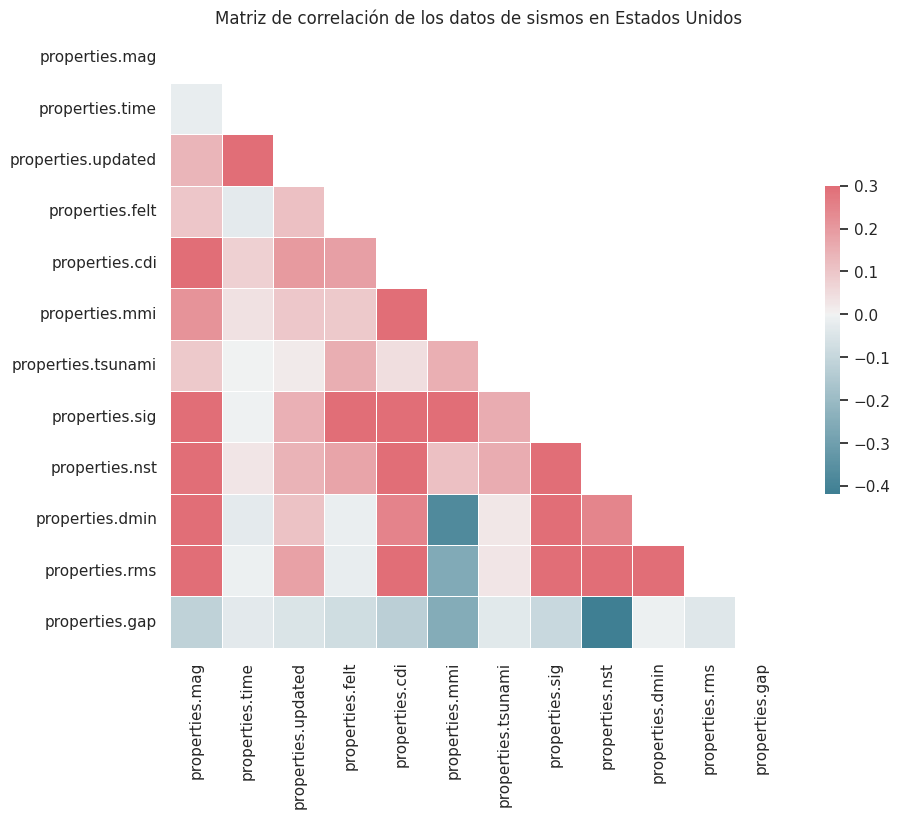

In [93]:
EEUU.matriz_correlacion('Estados Unidos',vars)

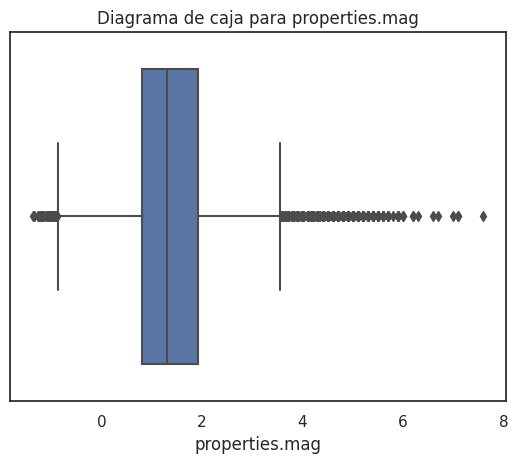

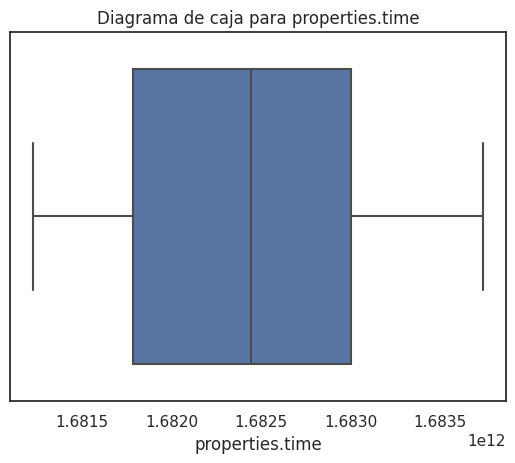

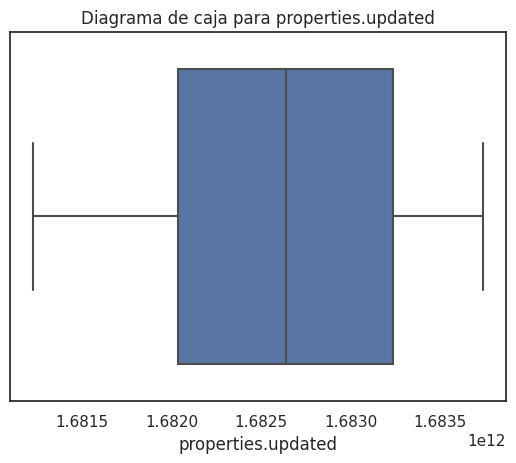

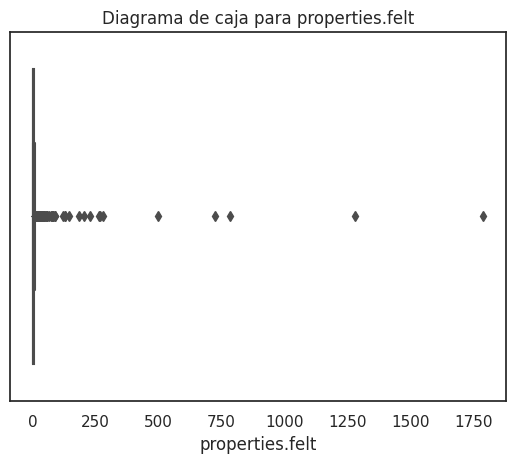

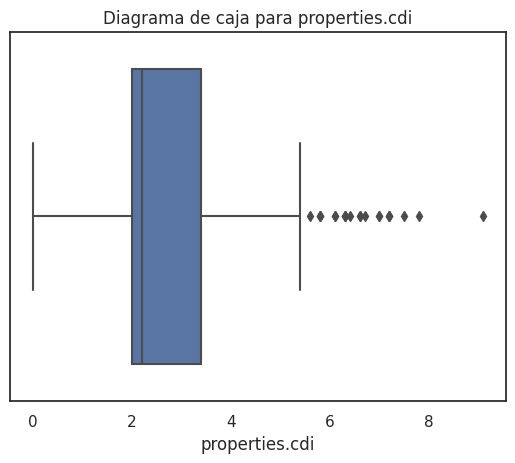

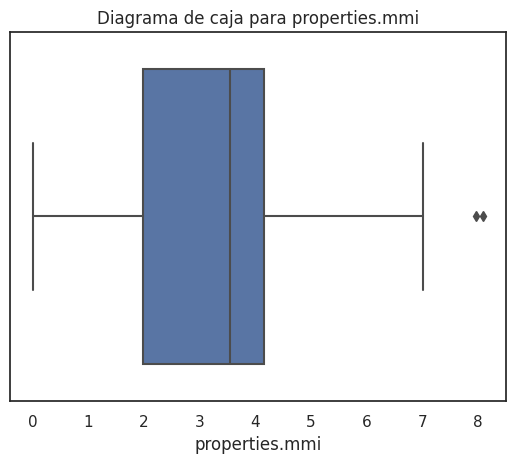

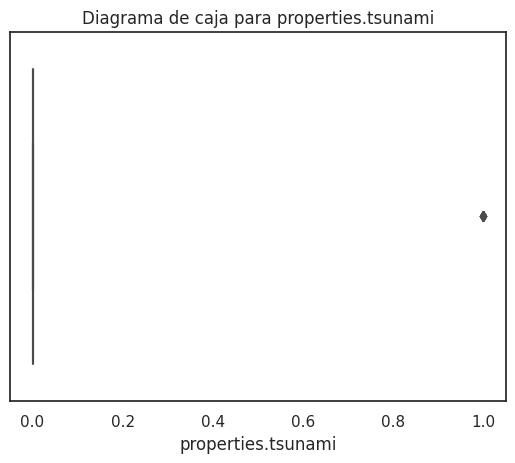

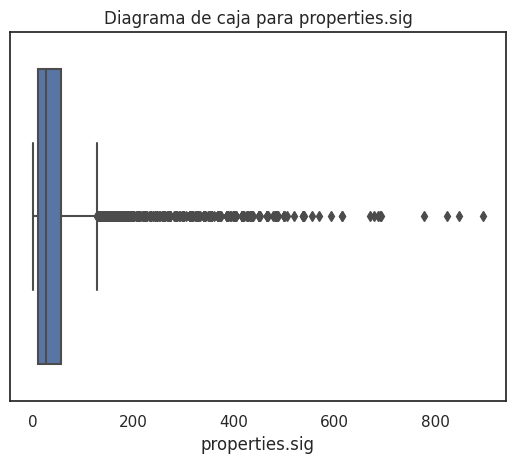

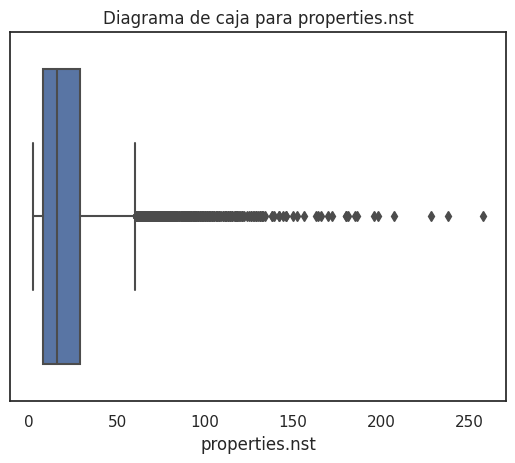

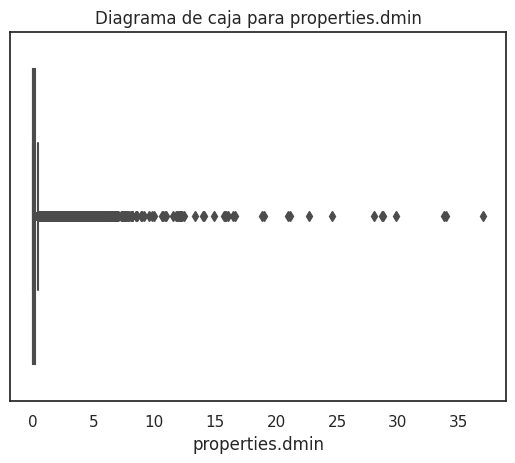

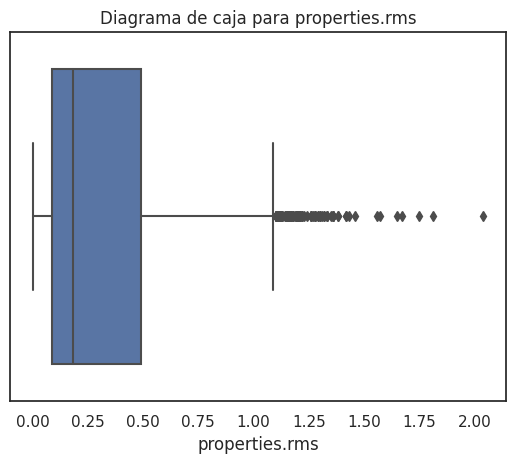

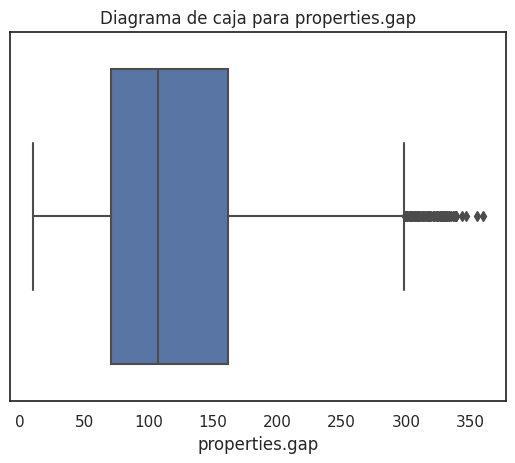

In [95]:
#aca se genera un diagrama de caja para ver los outlier

# Crear un diagrama de caja para cada columna utilizando la biblioteca Seaborn
for var in vars:
    plt.figure()
    sns.boxplot(x=df[var])
    plt.title('Diagrama de caja para ' + var)
    plt.show()


In [34]:
#aca convierto columna time a datetime para posterior utilizacion

dfEEUU['time'] = pd.to_datetime(dfEEUU['time'])


In [ ]:
['time', 'latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 
                        'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']